In [115]:
#load packages
from sklearn import tree,ensemble
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.model_selection  import cross_val_score, train_test_split, cross_validate, cross_val_score,KFold,RandomizedSearchCV,RepeatedKFold, GridSearchCV,StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, confusion_matrix, classification_report, roc_curve, auc
from sklearn import svm, neighbors
from sklearn.svm import SVR
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import svm,tree, neighbors,linear_model, preprocessing
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_curve, auc, r2_score
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.feature_selection import chi2, SelectKBest

In [116]:
df=pd.read_csv('C:/Users/yidan/Desktop/PA/hw3/spambase.data')
print(df.head())

      0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...  0.40  \
0  0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
1  0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
2  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
3  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.00   

    0.41  0.42  0.778   0.43   0.44  3.756   61   278  1  
0  0.132   0.0  0.372  0.180  0.048  5.114  101  1028  1  
1  0.143   0.0  0.276  0.184  0.010  9.821  485  2259  1  
2  0.137   0.0  0.137  0.000  0.000  3.537   40   191  1  
3  0.135   0.0  0.135  0.000  0.000  3.537   40   191  1  
4  0.223   0.0  0.000  0.000  0.000  3.000   15    54  1  

[5 rows x 58 columns]


In [117]:
X = df.iloc[:,:57]
y = df.iloc[:,57:58]

print(X.head())
print(y.head())

      0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...  0.39  \
0  0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...   0.0   
1  0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...   0.0   
2  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0.0   
3  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0.0   
4  0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...   0.0   

   0.40   0.41  0.42  0.778   0.43   0.44  3.756   61   278  
0  0.00  0.132   0.0  0.372  0.180  0.048  5.114  101  1028  
1  0.01  0.143   0.0  0.276  0.184  0.010  9.821  485  2259  
2  0.00  0.137   0.0  0.137  0.000  0.000  3.537   40   191  
3  0.00  0.135   0.0  0.135  0.000  0.000  3.537   40   191  
4  0.00  0.223   0.0  0.000  0.000  0.000  3.000   15    54  

[5 rows x 57 columns]
   1
0  1
1  1
2  1
3  1
4  1


### random forest

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)

In [119]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
flo

Random Forest R2: 0.725641
best parameters:
n_estimators: 15
max_depth: 19
test score: 0.934783
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       562
           1       0.96      0.87      0.91       358

    accuracy                           0.93       920
   macro avg       0.94      0.92      0.93       920
weighted avg       0.94      0.93      0.93       920



********************Random Forest********************


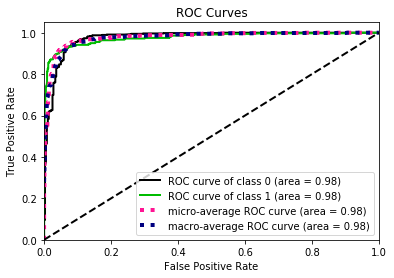

In [121]:
print('********************Random Forest********************')
y_probas_dt = grid.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_dt)
plt.show()

**************************Random Forest**************************


C:\Users\yidan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


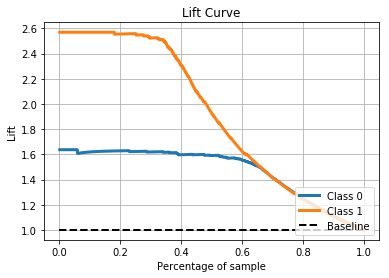

In [122]:
print('**************************Random Forest**************************')
skplt.metrics.plot_lift_curve(y_test, y_probas_dt)
plt.show()

************Random Forest************
474


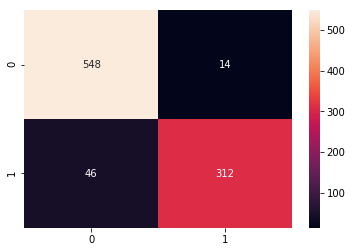

In [123]:
print('************Random Forest************')
cm = confusion_matrix(y_test,reg_dt.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
cost=cm[1][0]*10+cm[0][0]*0+cm[1][1]*0+cm[0][1]*1
print(cost)

### Decision Tree

In [125]:
#split train / test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#feature selection
X_new=SelectKBest(chi2,k=30).fit_transform(X_scale,y)
X_train, X_test, y_train, y_test = train_test_split(
    X_new, np.ravel(y), train_size=0.8)
k_fold = StratifiedKFold(n_splits=10)
clf_dt = tree.DecisionTreeClassifier(class_weight={1:1,0:10})
params = {'max_depth':range(1,20),'criterion':np.array(['entropy','gini'])}
scoring_fnc = make_scorer(accuracy_score)
grid = GridSearchCV(clf_dt, param_grid=params,scoring=scoring_fnc,cv=k_fold)
grid = grid.fit(X_train, y_train)
reg_dt = grid.best_estimator_
r2 = r2_score(y_test, grid.predict(X_test))

print('Decision Tree R2: %f'%r2)
print('best parameters:')
for key in params.keys():
    print('%s: %s'%(key, reg_dt.get_params()[key]))
print('test score: %f'%reg_dt.score(X_test, y_test))
print(classification_report(y_test,grid.predict(X_test)))

Decision Tree R2: 0.690400
best parameters:
max_depth: 13
criterion: entropy
test score: 0.925000
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       541
           1       0.95      0.86      0.90       379

    accuracy                           0.93       920
   macro avg       0.93      0.92      0.92       920
weighted avg       0.93      0.93      0.92       920



********************Decision Tree********************


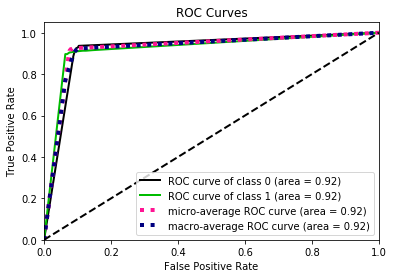

In [9]:
print('********************Decision Tree********************')
y_probas_dt = reg_dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_dt)
plt.show()

********************Decision Tree********************


C:\Users\yidan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


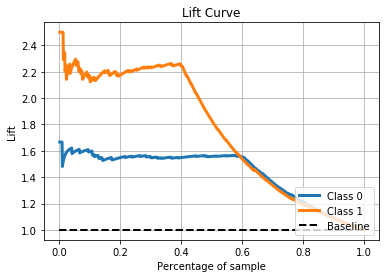

In [10]:
print('********************Decision Tree********************')
skplt.metrics.plot_lift_curve(y_test, y_probas_dt)
plt.show()

546


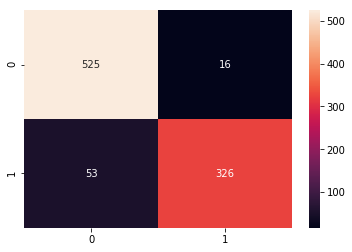

In [126]:
# cost eval
cm = confusion_matrix(y_test,reg_dt.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
cost=cm[1][0]*10+cm[0][0]*0+cm[1][1]*0+cm[0][1]*1
print(cost)

### Logistic Regession

In [131]:
#Normalize X on linear Logistic regression
#by setting max_iter: set to a large value
#speeding up convergence and interpreting coefficients
#feature selection will lead to worse performance and R2
#since more feature brings more information to y prediction

scaler = preprocessing.StandardScaler().fit(X)
X_scale = scaler.transform(X)  

#X_new=SelectKBest(chi2,k=30).fit_transform(X_scale,y)
X_train, X_test, y_train, y_test = train_test_split(
    X_scale, np.ravel(y), train_size=0.8)
k_fold = StratifiedKFold(n_splits=10)
clf_log = linear_model.LogisticRegression(solver='liblinear',class_weight={1:1,0:10})

#clf_log = linear_model.LogisticRegression(solver='liblinear',class_weight={1:1,0:10})
param_range = [0.01,0.1, 1, 10, 100]
params= {'C': param_range, 'penalty': ['l1','l2']}
scoring_fnc = make_scorer(accuracy_score)
grid = GridSearchCV(clf_log, param_grid=params,scoring=scoring_fnc,cv=k_fold)
grid = grid.fit(X_train, y_train)
clf_log = grid.best_estimator_
r2 = r2_score(y_test, grid.predict(X_test))

print('Linear Regression R2: %f'%r2)
print('best parameters:')
for key in params.keys():
    print('%s: %s'%(key, clf_log.get_params()[key]))
print('test score: %f'%clf_log.score(X_test, y_test))
print(classification_report(y_test,grid.predict(X_test)))

Linear Regression R2: 0.374083
best parameters:
C: 100
penalty: l2
test score: 0.854348
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       581
           1       0.98      0.62      0.76       339

    accuracy                           0.85       920
   macro avg       0.90      0.81      0.83       920
weighted avg       0.88      0.85      0.85       920



****************Logistic Regression****************


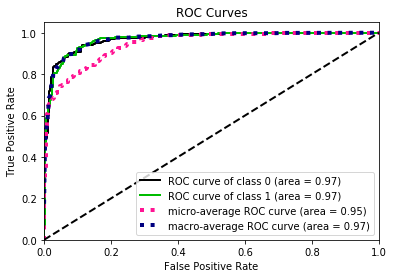

In [89]:
print('****************Logistic Regression****************')
y_probas_log = clf_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_log)
plt.show()

****************Logistic Regression****************


C:\Users\yidan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


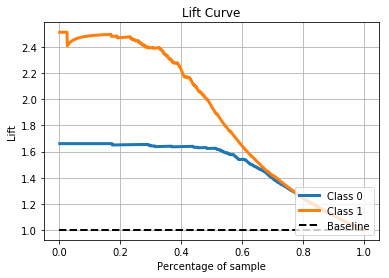

In [90]:
print('****************Logistic Regression****************')
skplt.metrics.plot_lift_curve(y_test, y_probas_log)
plt.show()

************Logistic Regression Performance************
1295


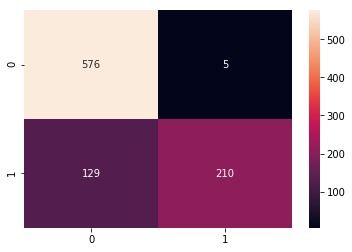

In [132]:
print('************Logistic Regression Performance************')
cm = confusion_matrix(y_test,clf_log.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
cost=cm[1][0]*10+cm[0][0]*0+cm[1][1]*0+cm[0][1]*1
print(cost)

### KNN

In [133]:
#Normalized X
scaler = preprocessing.MinMaxScaler().fit(X)
X_scale = scaler.transform(X)  
X_scale[0,:]

#feature select to 30 most valuable ones
X_new=SelectKBest(chi2,k=30).fit_transform(X_scale,y)

#split train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_new, np.ravel(y), train_size=0.8)
k_fold = StratifiedKFold(n_splits=10)
clf_KNN = neighbors.KNeighborsClassifier()
weight_options = ["uniform", "distance"]
params = {'n_neighbors':range(1,20), 'weights':weight_options}
scoring_fnc = make_scorer(accuracy_score)
grid = GridSearchCV(clf_KNN, param_grid=params,scoring=scoring_fnc,cv=k_fold)
grid = grid.fit(X_train, y_train)
clf_KNN = grid.best_estimator_
r2 = r2_score(y_test, grid.predict(X_test))

print('KNN R2: %f'%r2)
print('best parameters:')
for key in params.keys():
    print('%s: %s'%(key, clf_KNN.get_params()[key]))
print('test score: %f'%clf_KNN.score(X_test, y_test))
print(classification_report(y_test,grid.predict(X_test)))

KNN R2: 0.636335
best parameters:
n_neighbors: 9
weights: distance
test score: 0.913043
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       556
           1       0.92      0.85      0.89       364

    accuracy                           0.91       920
   macro avg       0.91      0.90      0.91       920
weighted avg       0.91      0.91      0.91       920



************************KNN************************


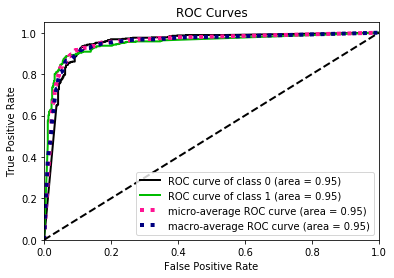

In [56]:
print('************************KNN************************')
y_probas_KNN = clf_KNN.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_KNN)
plt.show()

************************KNN************************


C:\Users\yidan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


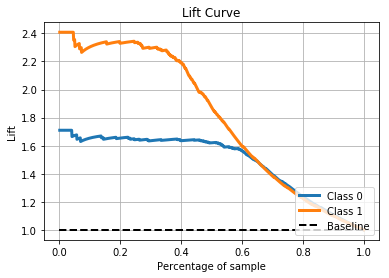

In [57]:
print('************************KNN************************')
skplt.metrics.plot_lift_curve(y_test, y_probas_KNN)
plt.show()

************Logistic Regression Performance************
557


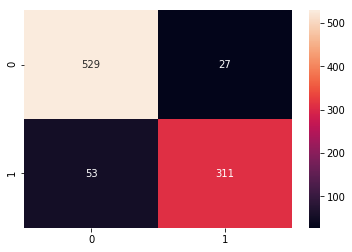

In [134]:
print('************Logistic Regression Performance************')
cm = confusion_matrix(y_test,clf_KNN.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
cost=cm[1][0]*10+cm[0][0]*0+cm[1][1]*0+cm[0][1]*1
print(cost)

### SVM

In [136]:
#feature selection by top 30
X_new=SelectKBest(chi2,k=30).fit_transform(X_scale,y)

#split train/test set
X_train, X_test, y_train, y_test = train_test_split(
    X_new, np.ravel(y), train_size=0.8)

k_fold = StratifiedKFold(n_splits=5)
clf_SVM = svm.SVC(kernel='linear',probability=True,class_weight={1:1,0:10})
C_range = [0.01, 1, 100]
gamma_range = [0.1, 1, 10]
params = {'C': C_range, 'gamma':gamma_range}
scoring_fnc = make_scorer(accuracy_score)
grid = GridSearchCV(clf_SVM, param_grid=params,scoring=scoring_fnc,cv=k_fold)
grid = grid.fit(X_train, y_train)
clf_SVM = grid.best_estimator_
r2 = r2_score(y_test, grid.predict(X_test))

print('KNN R2: %f'%r2)
print('best parameters:')
for key in params.keys():
    print('%s: %s'%(key, clf_SVM.get_params()[key]))
print('test score: %f'%clf_SVM.score(X_test, y_test))
print(classification_report(y_test,grid.predict(X_test)))

KNN R2: 0.333018
best parameters:
C: 100
gamma: 0.1
test score: 0.840217
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       554
           1       0.98      0.61      0.75       366

    accuracy                           0.84       920
   macro avg       0.89      0.80      0.82       920
weighted avg       0.87      0.84      0.83       920



***************SVM Performance***************
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       556
           1       0.91      0.87      0.89       364

    accuracy                           0.92       920
   macro avg       0.91      0.91      0.91       920
weighted avg       0.92      0.92      0.91       920



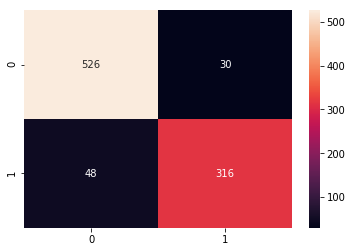

In [61]:
print('***************SVM Performance***************')
cm = confusion_matrix(y_test,clf_SVM.predict(X_test))
print(classification_report(y_test,clf_SVM.predict(X_test)))

**************************SVM**************************


C:\Users\yidan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


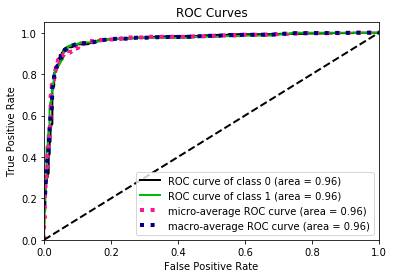

In [62]:
print('**************************SVM**************************')
y_probas_SVM = clf_SVM.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas_SVM)
plt.show()

**************************SVM**************************


C:\Users\yidan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


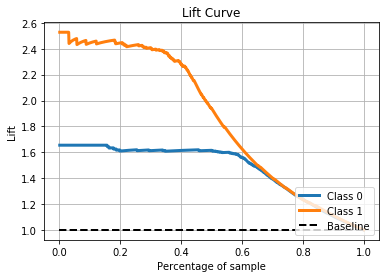

In [63]:
print('**************************SVM**************************')
skplt.metrics.plot_lift_curve(y_test, y_probas_SVM)
plt.show()

************Logistic Regression Performance************
8564


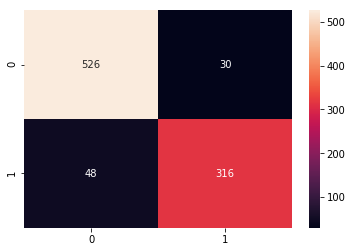

In [64]:
#cost eval
print('************Logistic Regression Performance************')
cm = confusion_matrix(y_test,clf_SVM.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
cost=cm[1][0]*10+cm[0][0]*0+cm[1][1]*0+cm[0][1]*1
print(cost)

In [105]:
%matplotlib inline

### Nested CV

In [114]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 10

# Load the dataset
df=pd.read_csv('C:/Users/yidan/Desktop/PA/hw3/spambase.data')
X = df.iloc[:,:57]
y = df.iloc[:,57:58]

# Set up possible values of parameters to optimize over
p_grid = {'n_estimators': range(1,20),
                 'max_depth': range(1,20)}

# We will use a Support Vector Classifier with "rbf" kernel
model = ['random forset','knn','decision tree','svm','logistic regression']
clf_rd = ensemble.RandomForestClassifier(class_weight={1:1,0:10})
clf_SVM = svm.SVC(kernel='linear',probability=True)
clf_KNN = neighbors.KNeighborsClassifier(class_weight={1:1,0:10})
clf_log = linear_model.LogisticRegression(solver='liblinear')
clf_dt = tree.DecisionTreeClassifier(class_weight={1:1,0:10})

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    
    #clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


print("The best model: {0}  with Average nested_score of {1:6f} with std. dev. of {2:6f}."
      .format('clf_rd',nested_score.mean(), nested_score.std()))


Automatically created module for IPython interactive environment
The best model: clf_rd  with Average nested_score of 0.924565 with std. dev. of 0.008682.
